In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('pretest.csv')

### Train data

In [3]:
train.head()

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
0,mof_unit_1,1116.667429,875.240600,0.00,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
1,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,44,57,etb,33.616780,7.147286,101.224774
2,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011
3,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,17,24,sra,25.701377,6.190085,187.626004
4,mof_unit_5,1137.800963,901.736120,0.00,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001


In [4]:
train.columns

Index(['MOFname', 'volume [A^3]', 'weight [u]', 'surface_area [m^2/g]',
       'void_fraction', 'void_volume [cm^3/g]', 'functional_groups',
       'metal_linker', 'organic_linker1', 'organic_linker2', 'topology',
       'CO2/N2_selectivity', 'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
       'CO2_working_capacity [mL/g]'],
      dtype='object')

In [5]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)
print("Train data: {} rows, {} columns, {} missing values".format(train.shape[0], train.shape[1], sum(train.isna().sum())))

Train data: 68613 rows, 14 columns, 2412 missing values


In [6]:
train.describe()

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
count,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,66524.000000,68613.000000
mean,3447.363207,1656.761858,1666.766690,0.259164,0.376052,4.203271,11.919257,20.583592,28.599681,6.020647,120.002797
std,4840.665782,1259.086320,1366.317223,0.164758,0.476452,3.144905,10.783136,10.100870,153.806887,1.384284,89.573112
min,606.576038,439.281220,-1.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.612299,-44.285746
25%,1556.075767,893.662700,511.930000,0.142580,0.119000,2.000000,4.000000,14.000000,12.818366,5.267474,65.537205
50%,2190.442847,1259.699253,1542.830000,0.242620,0.248400,3.000000,10.000000,20.000000,19.689890,5.899010,98.552185
75%,3605.836441,1897.163660,2517.960000,0.345120,0.443800,4.000000,16.000000,25.000000,32.954388,6.768300,163.139540
max,223964.854408,22595.928960,7083.530000,0.872060,6.610100,12.000000,59.000000,59.000000,29369.777780,17.155375,736.061636


## Test data

In [7]:
test.head()

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]
0,mof_unit_pretest_1,6288.293858,2271.68714,4148.48,0.41225,0.6872,OPr,4,7,27,acs,14.048791,5.604779
1,mof_unit_pretest_2,1790.506437,887.74732,2191.34,0.30231,0.3672,HCO-OPr,2,4,26,pcu,20.217222,6.148776
2,mof_unit_pretest_3,2348.969203,1239.76588,2030.88,0.28533,0.3256,SO3H-OH,3,18,22,pcu,33.108662,6.164397
3,mof_unit_pretest_4,2941.571525,1147.95140,3587.13,0.41963,0.6475,Et-OH,2,8,15,pcu,12.800562,5.164957
4,mof_unit_pretest_5,705.397601,643.27074,0.00,0.07060,0.0466,Cl-H,3,10,22,pcu,23.395617,7.090687


In [8]:
test.replace([np.inf, -np.inf], np.nan, inplace=True)
print("Test data: {} rows, {} columns, {} missing values".format(test.shape[0], test.shape[1], sum(test.isna().sum())))

Test data: 2000 rows, 13 columns, 21 missing values


In [9]:
test.describe()

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5011.180558,1896.448436,2133.746110,0.324054,0.564317,3.997500,11.396500,20.334500,23.307845,5.577378
std,7312.758142,1582.597825,1572.311904,0.192284,0.679998,3.077861,10.223431,9.746749,23.929102,1.572049
min,670.112177,467.013680,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.282612,1.756585
25%,1644.506152,919.679909,895.837500,0.175725,0.156375,2.000000,4.000000,14.000000,8.877622,4.745690
50%,2455.995459,1350.964070,1979.545000,0.294265,0.331450,3.000000,10.000000,21.000000,16.303688,5.606423
75%,4462.682964,2175.151385,3217.427500,0.428627,0.657000,4.000000,16.000000,25.000000,29.496207,6.529271
max,80465.312439,16731.484800,6685.940000,0.868710,5.208300,12.000000,56.000000,58.000000,456.298648,10.700387


## Check for missing values

In [10]:
missing_train = pd.DataFrame(train.isna().sum())
missing_train = missing_train.drop(['MOFname', 'CO2_working_capacity [mL/g]']).reset_index()
missing_train.columns = ['feature', 'count']
print(missing_train)

                                          feature  count
0                                    volume [A^3]      0
1                                      weight [u]      0
2                            surface_area [m^2/g]      0
3                                   void_fraction      0
4                            void_volume [cm^3/g]      0
5                               functional_groups    323
6                                    metal_linker      0
7                                 organic_linker1      0
8                                 organic_linker2      0
9                                        topology      0
10                             CO2/N2_selectivity      0
11  heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]   2089


In [11]:
missing_test = pd.DataFrame(test.isna().sum())
missing_test = missing_test.drop(['MOFname']).reset_index()
missing_test.columns = ['feature', 'count']
print(missing_test)

                                          feature  count
0                                    volume [A^3]      0
1                                      weight [u]      0
2                            surface_area [m^2/g]      0
3                                   void_fraction      0
4                            void_volume [cm^3/g]      0
5                               functional_groups     21
6                                    metal_linker      0
7                                 organic_linker1      0
8                                 organic_linker2      0
9                                        topology      0
10                             CO2/N2_selectivity      0
11  heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]      0


## Distribution

In [12]:
train = train.drop(columns=['MOFname'])

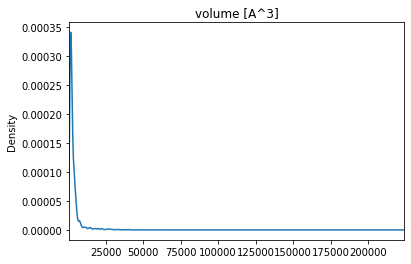

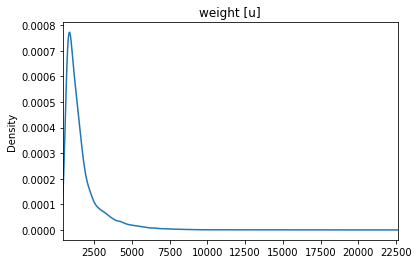

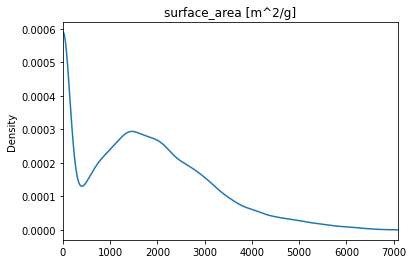

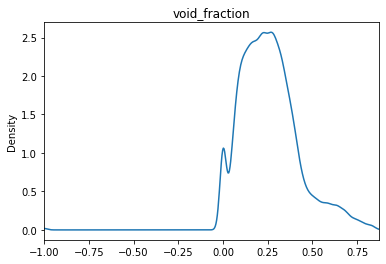

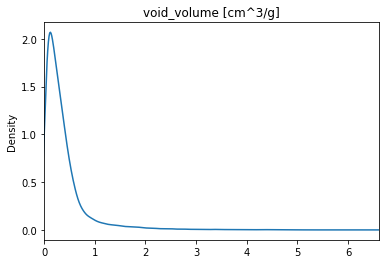

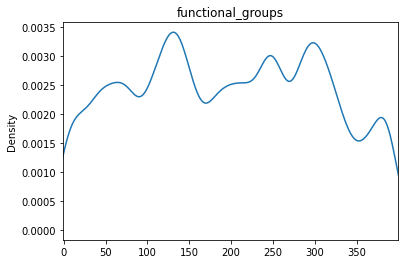

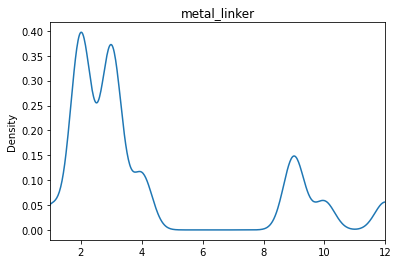

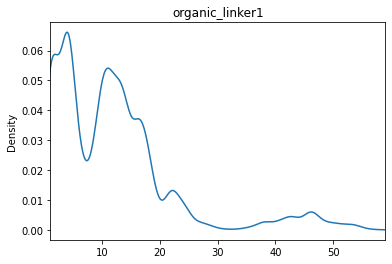

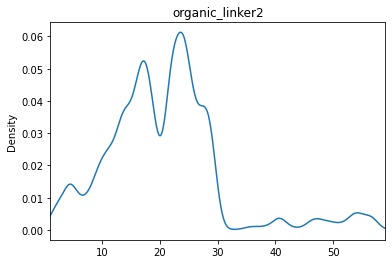

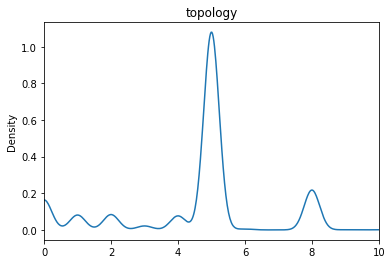

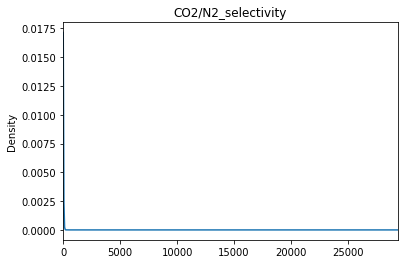

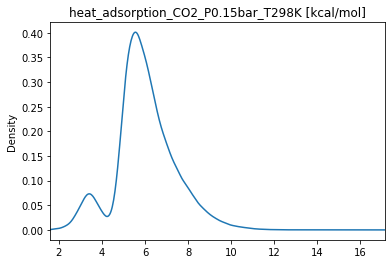

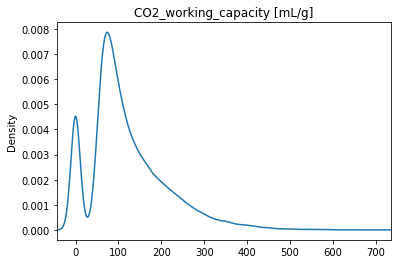

In [20]:
# train_array = train.to_numpy()
for i, col in enumerate(train.columns):
    if not np.issubdtype(train[col].dtype, np.number):
        train[col] = train[col].astype('category').cat.codes
    train[col].plot(fig=plt.figure(i), kind='density', xlim=(train[col].min(), train[col].max()))
    plt.title(col)
plt.show()

In [14]:
test = test.drop(columns=['MOFname'])

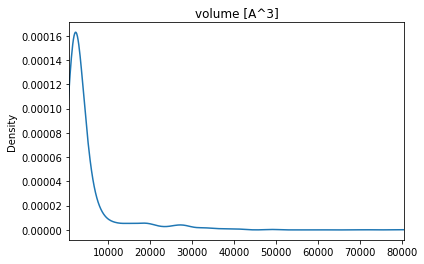

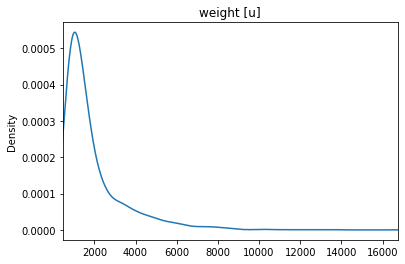

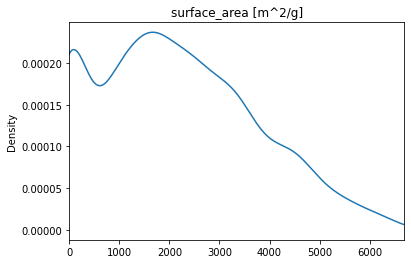

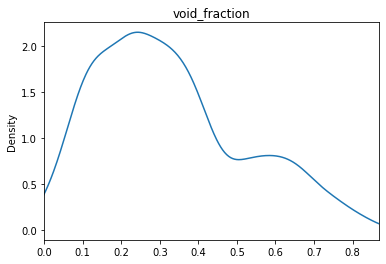

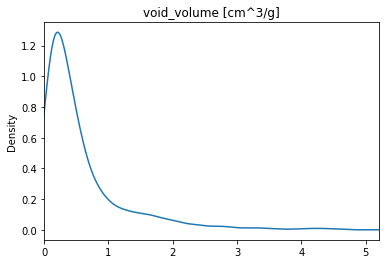

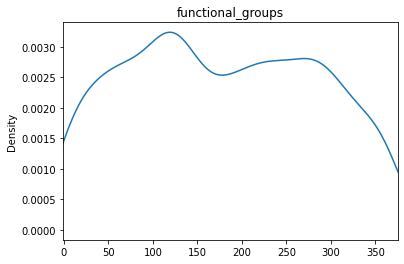

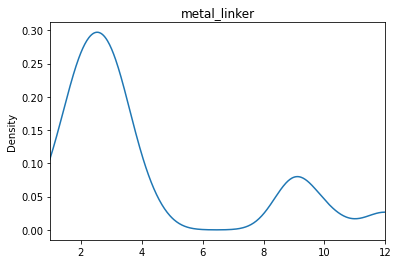

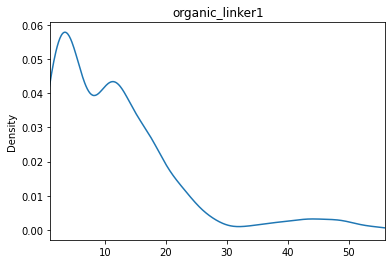

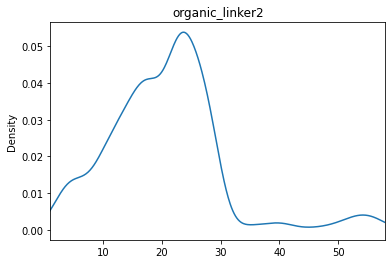

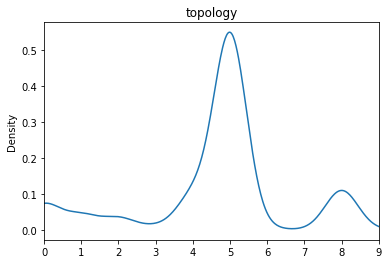

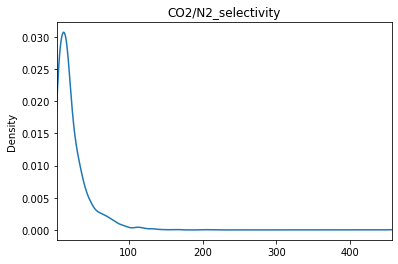

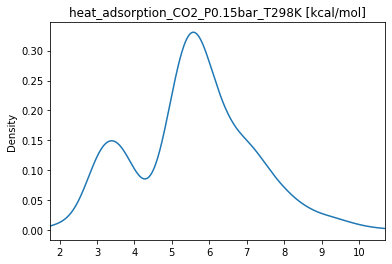

In [15]:
# train_array = train.to_numpy()
for i, col in enumerate(test.columns):
    if not np.issubdtype(test[col].dtype, np.number):
        test[col] = test[col].astype('category').cat.codes
    test[col].plot(fig=plt.figure(i), kind='density', xlim=(test[col].min(), test[col].max()))
    plt.title(col)
plt.show()

## Correlation

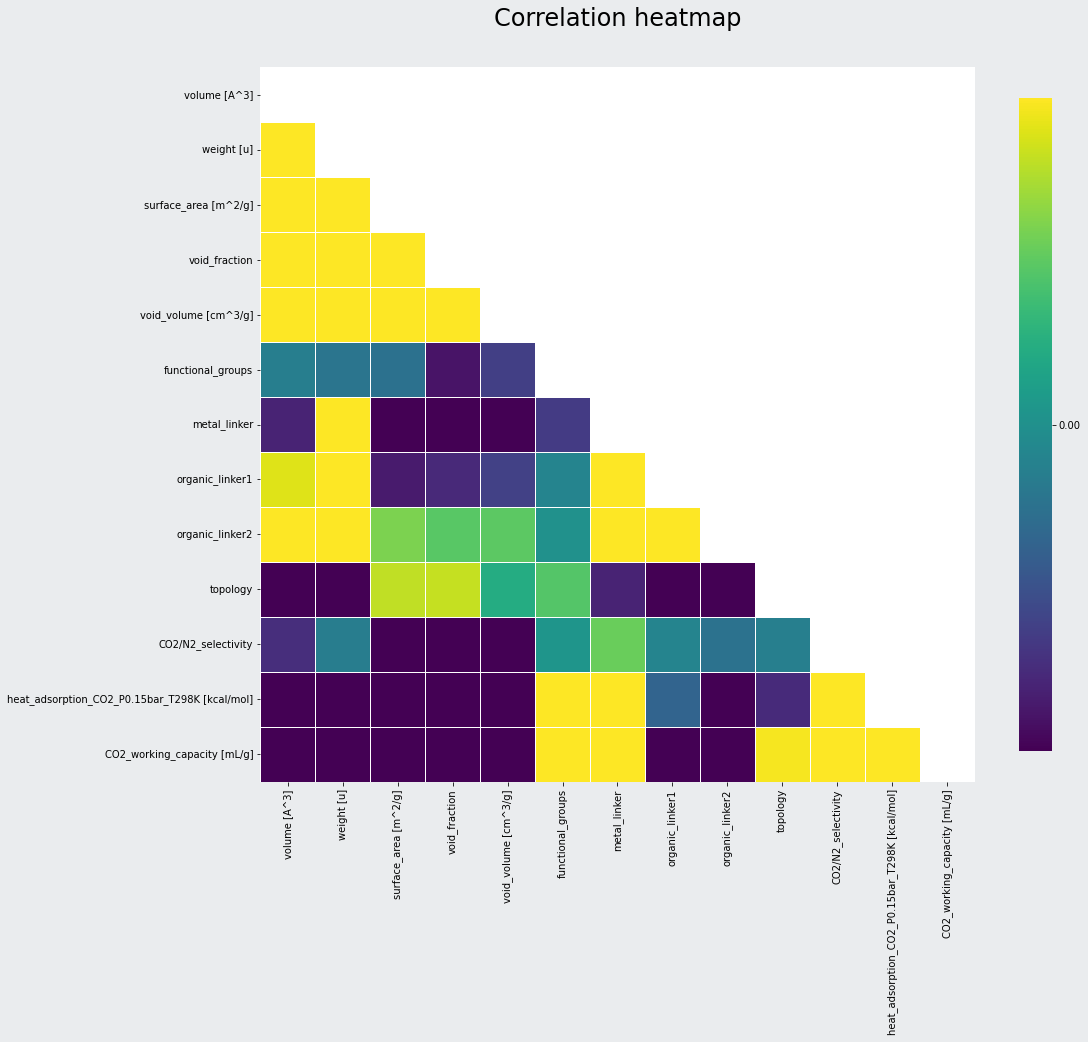

In [16]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 16), facecolor='#EAECEE')
cmap = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.05, vmin=-0.05, center=0, annot=False,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.75})

ax.set_title('Correlation heatmap', fontsize=24, y= 1.05)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-0.75, 0, 0.75])

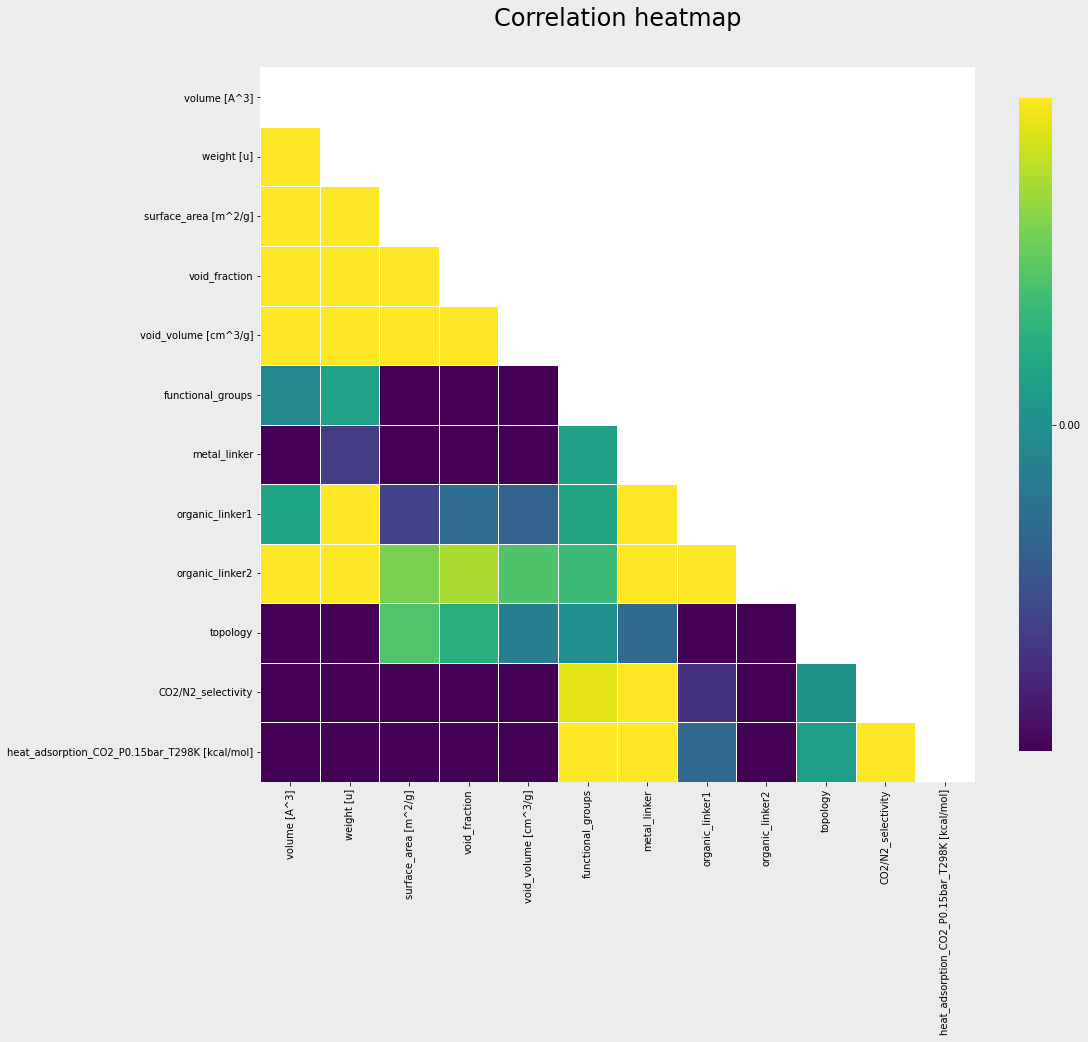

In [17]:
corr = test.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 16), facecolor='#EAECEE')
cmap = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.05, vmin=-0.05, center=0, annot=False,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.75})

ax.set_title('Correlation heatmap', fontsize=24, y= 1.05)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-0.75, 0, 0.75])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6c1c264d-3d80-4f80-bae8-8af96b446f78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>